# Módulo 14: Scripting II
# Exercício 1: Geração de gráficos com parâmetros em uma lista


Meses:
['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
Digite o número do mês desejado (ou 's' para SAIR): 03
Mês Março adicionado.
Digite o número do mês desejado (ou 's' para SAIR): 07
Mês Julho adicionado.
Digite o número do mês desejado (ou 's' para SAIR): s
Dados gerados com sucesso para o mês de Março!
Dados gerados com sucesso para o mês de Julho!


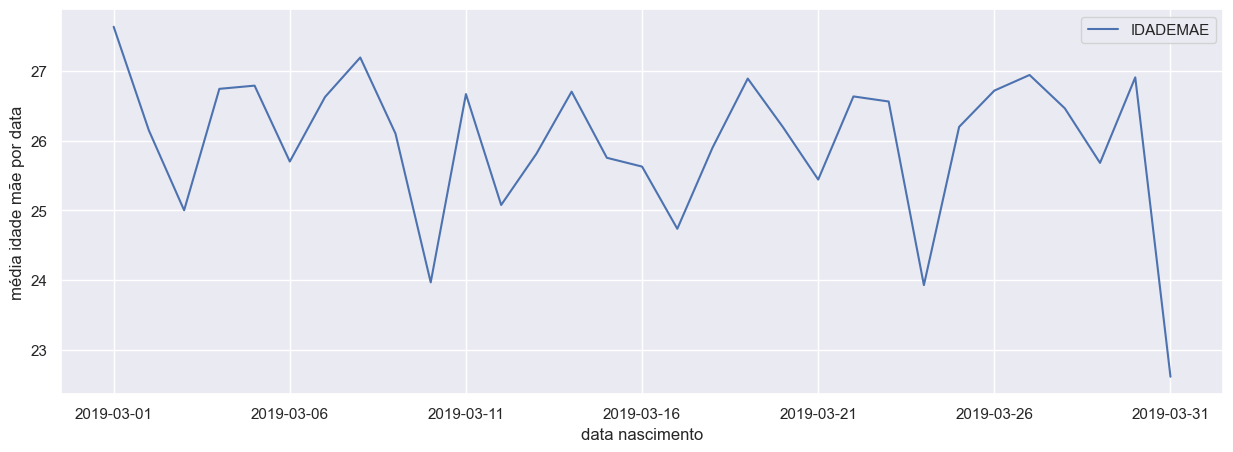

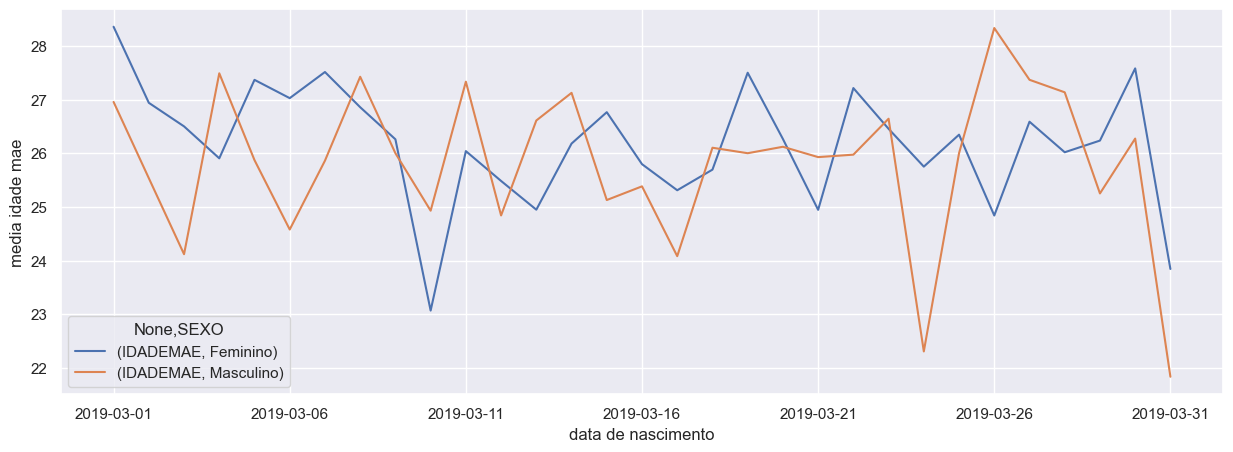

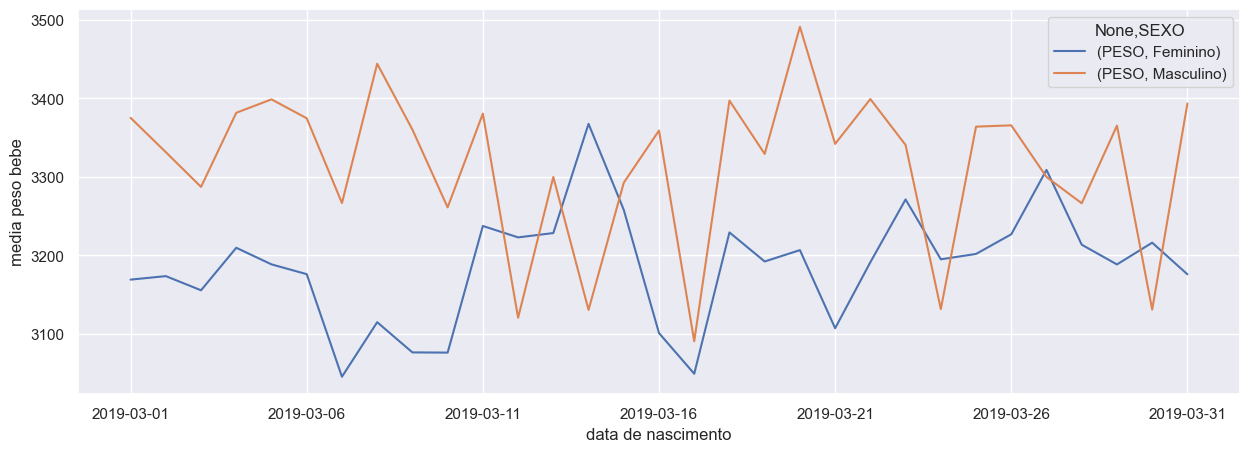

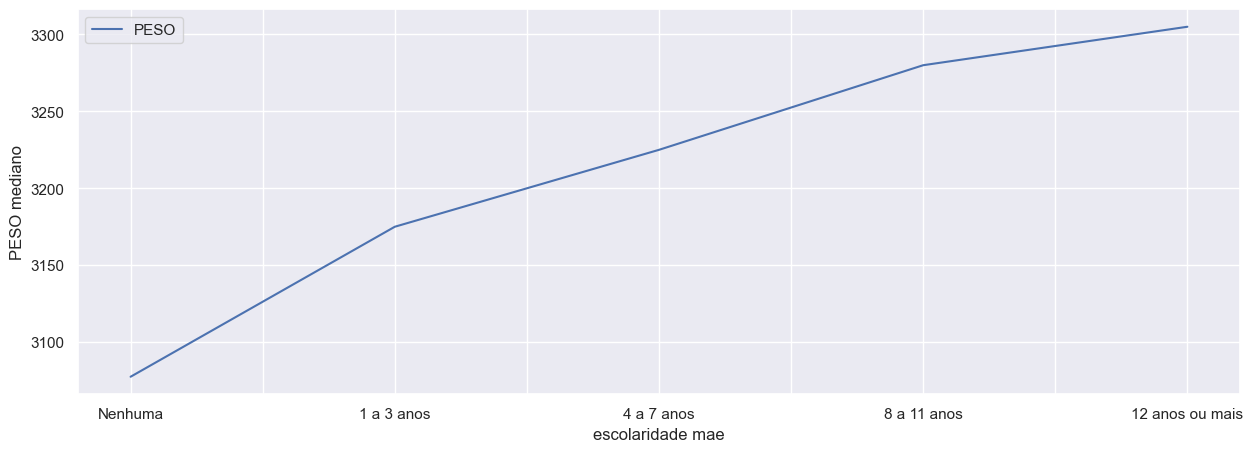

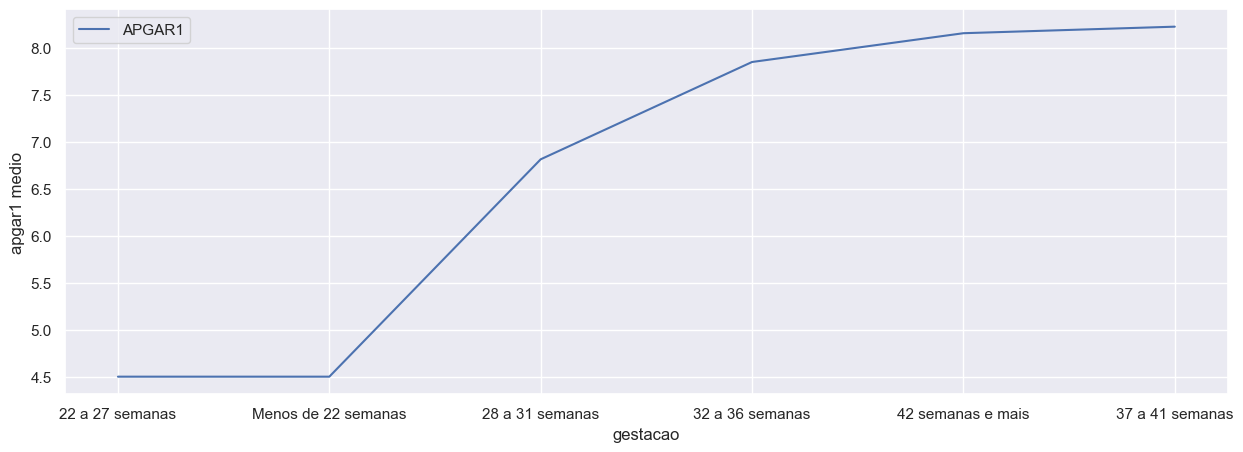

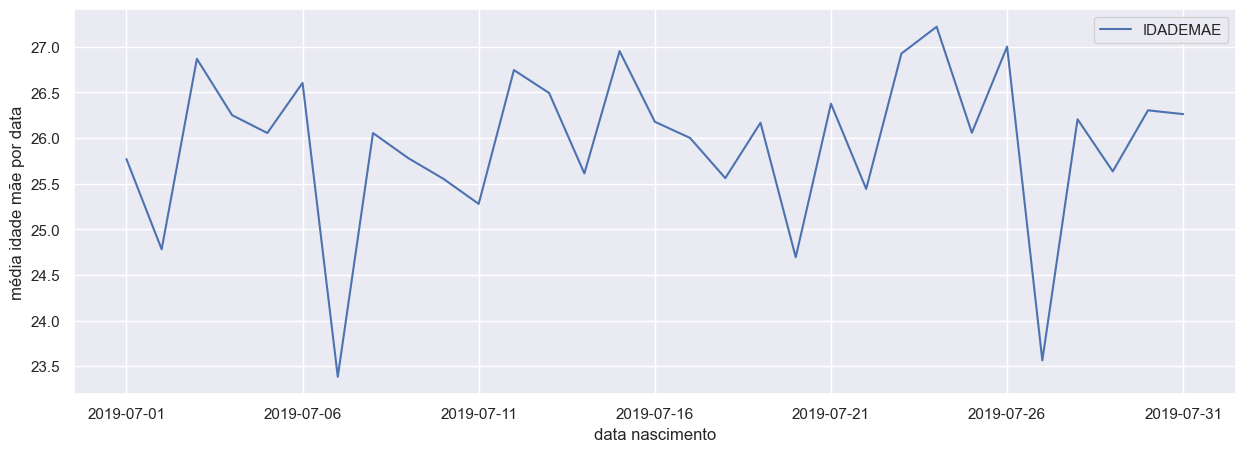

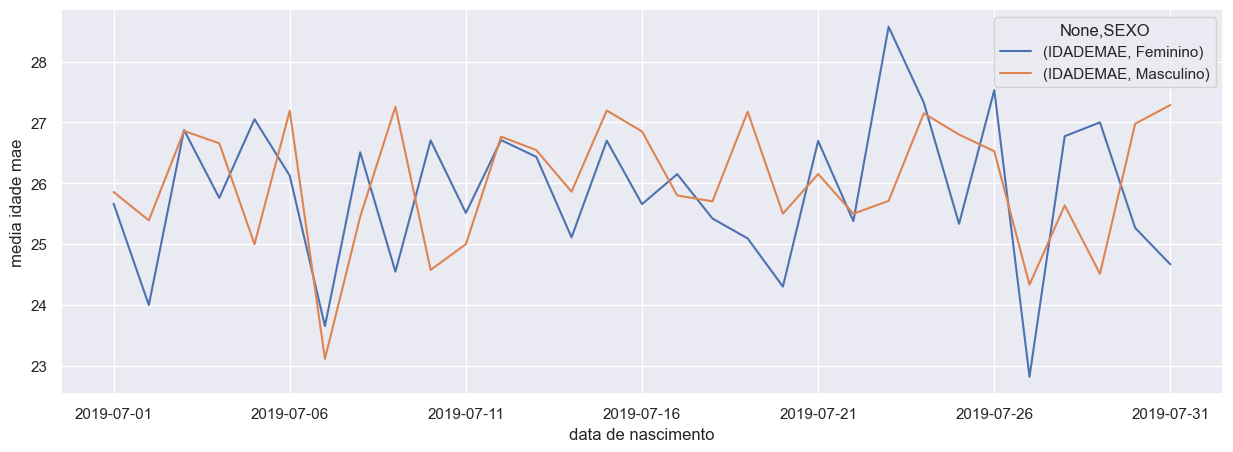

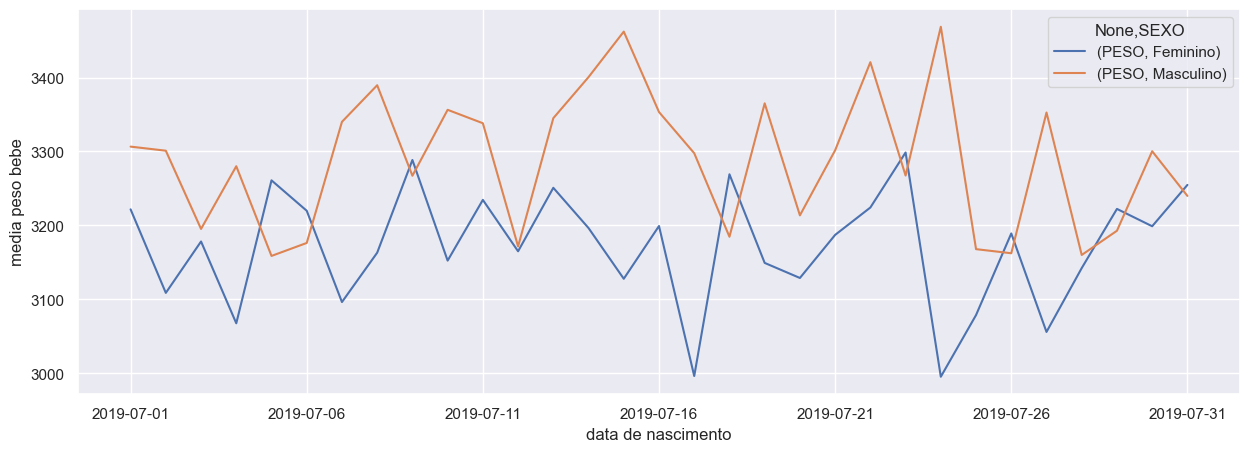

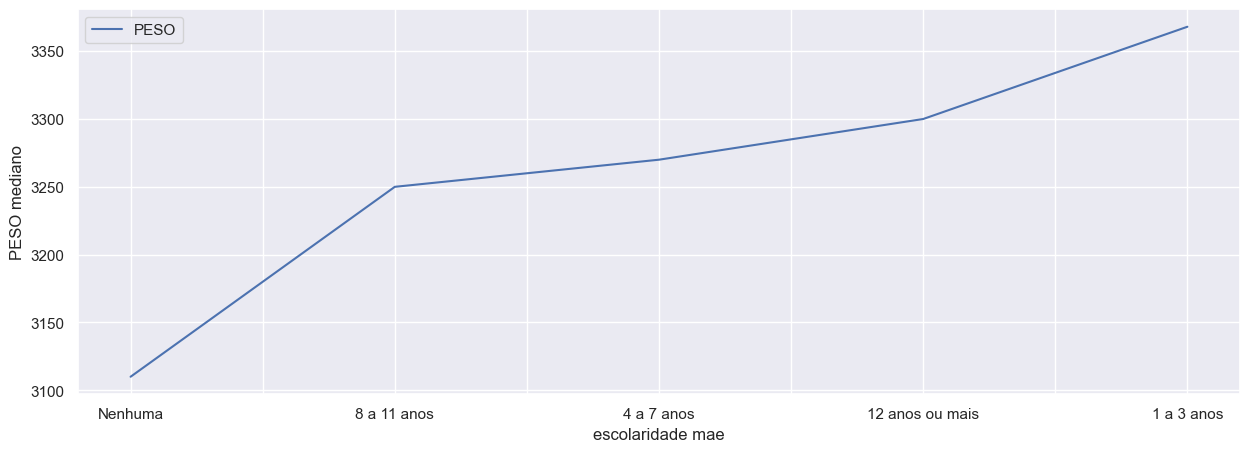

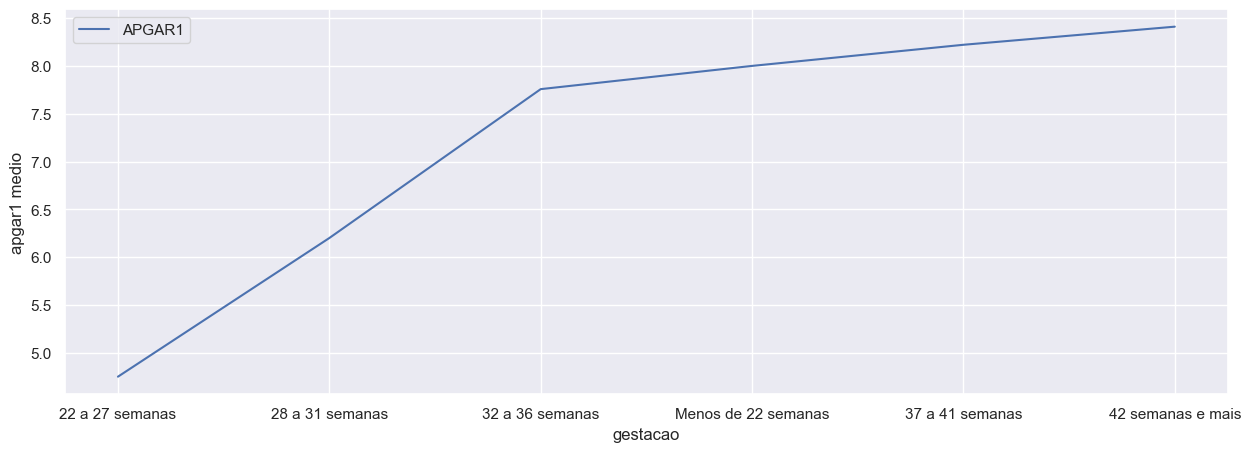

In [29]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()  

# função para plotar pivot table
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# carregando o dataFrame
sinasc = pd.read_csv('./input/SINASC_RO_2019.csv')

mapa_meses = {
    '01': 'Janeiro',
    '02': 'Fevereiro',
    '03': 'Março',
    '04': 'Abril',
    '05': 'Maio',
    '06': 'Junho',
    '07': 'Julho',
    '08': 'Agosto',
    '09': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'
}

# printar meses
print("Meses:")
print(list(mapa_meses.values()))

# Solicitar ao usuário que escolha os meses (pode escolher mais de um)
meses_escolhidos = []
while True:
    numero_mes_desejado = input("Digite o número do mês desejado (ou 's' para SAIR): ")

    if numero_mes_desejado.lower() == 's':
        break

    # Verificar se o número do mês escolhido está no mapa
    if numero_mes_desejado not in mapa_meses:
        print("O mês digitado NÃO é válido. Digite um número de mês válido!")
        continue

    # Obter o nome do mês correspondente
    mes_desejado = mapa_meses[numero_mes_desejado]

    # Filtrar os dados para o mês desejado
    sinasc_mes = sinasc[pd.to_datetime(sinasc['DTNASC']).dt.month == int(numero_mes_desejado)]

    if sinasc_mes.empty:
        print(f"Nenhum dado encontrado para o mês {mes_desejado}. Escolha outro mês.")
        continue

    # Pegar a maior data com os 7 primeiros caracteres
    max_data = sinasc_mes.DTNASC.max()[:7]
    print(f"Mês {mes_desejado} adicionado.")

    # Armazenar o mês escolhido na lista "meses_escolhidos"
    meses_escolhidos.append((numero_mes_desejado, mes_desejado, max_data))

# Criar diretórios e gerar gráficos para cada mês escolhido
for numero_mes, mes_nome, max_data in meses_escolhidos:
    output_dir = f'./output/figs/{max_data}/{mes_nome.replace(" ", "_")}'
    os.makedirs(output_dir, exist_ok=True)

    # Filtrar os dados para o mês desejado
    sinasc_mes = sinasc[pd.to_datetime(sinasc['DTNASC']).dt.month == int(numero_mes)]

    if sinasc_mes.empty:
        print(f"Nenhum dado encontrado para o mês {mes_nome}. Ignorando este mês.")
        continue

    # Chamar a função para todos os cenários e salvá-los
    plota_pivot_table(sinasc_mes, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
    plt.savefig(os.path.join(output_dir, 'media_idade_mae_por_data.png'))

    plota_pivot_table(sinasc_mes, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae', 'data de nascimento', 'unstack')
    plt.savefig(os.path.join(output_dir, 'media_idade_mae_por_sexo.png'))

    plota_pivot_table(sinasc_mes, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe', 'data de nascimento', 'unstack')
    plt.savefig(os.path.join(output_dir, 'media_peso_bebe_por_sexo.png'))

    plota_pivot_table(sinasc_mes, 'PESO', 'ESCMAE', 'median', 'PESO mediano', 'escolaridade mae', 'sort')
    plt.savefig(os.path.join(output_dir, 'PESO_mediano_por_escolaridade_mae.png'))

    plota_pivot_table(sinasc_mes, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio', 'gestacao', 'sort')
    plt.savefig(os.path.join(output_dir, 'media apgar1 por gestacao.png'))
  
    
    print(f"Dados gerados com sucesso para o mês de {mes_nome}!")
